In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
tmpfs            26G   64M   26G   1% /run
/dev/nvme0n1p2  469G  305G  141G  69% /
tmpfs           126G  8.0K  126G   1% /dev/shm
tmpfs           5.0M  8.0K  5.0M   1% /run/lock
efivarfs        128K   17K  107K  14% /sys/firmware/efi/efivars
/dev/nvme2n1p1  2.9T   39G  2.7T   2% /usr/share/models
/dev/nvme0n1p1  240M   33M  207M  14% /boot/efi
share            90T   19T   71T  22% /share
share/backup     10T  4.5T  5.5T  45% /backup
tmpfs            26G  136K   26G   1% /run/user/125
tmpfs            26G  120K   26G   1% /run/user/1008
tmpfs            26G  140K   26G   1% /run/user/1001


In [2]:
from pathlib import Path
import mne
from fpcm_detector import detect_spikes_fpcm

edf_path = Path("/Users/vzuev/Documents/git/git_other/ArtifactRemovalTransformer/data/test.edf")
edf_path.exists()

ModuleNotFoundError: No module named 'fpcm_detector'

In [2]:
raw = mne.io.read_raw_edf(edf_path, preload=True)
results = detect_spikes_fpcm(
    raw,
    peak_hw_ms=30,
    wave_hw_ms=90,
    bkg_coeff=3,
    err_peak_th=0.3,
    err_wave_th=0.9,
    hit_threshold=1 #3,
)

Extracting EDF parameters from /Users/vzuev/Documents/git/git_other/ArtifactRemovalTransformer/data/test.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 495499  =      0.000 ...   990.998 secs...


channels: 100%|██████████| 22/22 [00:06<00:00,  3.22it/s]


In [9]:
sum([sum(row) > 3 for row in results["hits"]]) # 0 (as should be)

11

1it [00:00, 4190.11it/s]


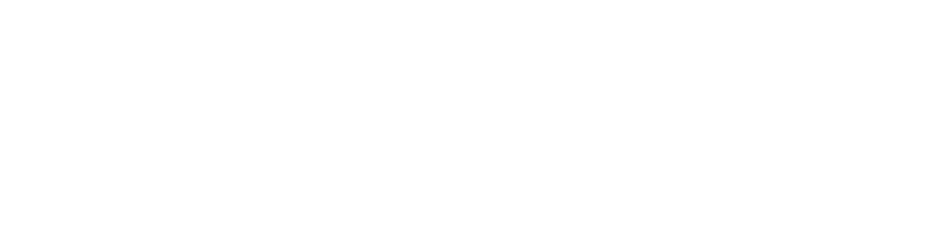

In [ ]:
from typing import Final
from summary import overlay_spline_fit_grid

results_short = results.copy()
n_short: Final[int] = 1

for k in results_short.keys():
    try:
        results_short[k] = results_short[k][:n_short]
    except:
        pass

overlay_spline_fit_grid(raw, results_short)

In [7]:
results_short

{'peaks_samples': array([2939, 3484, 4083, 4654, 5212]),
 'events': array([[2939,    0,    1],
        [3484,    0,    1],
        [4083,    0,    1],
        [4654,    0,    1],
        [5212,    0,    1]]),
 'hits': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'coeffs': [array([[-1.33122221e-11, -2.56120541e-11, -3.69444836e-11, ...,
          -3.02154982e-07, -3.01681412e-07, -3.05650357e-07],
         [-1.37559628e-10, -2.64657893e-10, -3.81759664e-10, ...,
          -2.78741284e-05, -2.77560227e-05, -2.75656208e-05],
         [ 4.19572715e-11,  8.07237063e-11,  1.16441096e-10, ...,
           9.23548549e-07,  9.34110645e-07,  9.33504278e-07],
         [-1.37559628e-10, -2.64657893e-10, -3.81759664e-10, ...,
          -2.78741284e-05, -2.775602

Вопросы:
1. В алгоритме много параметров. Пробовали ли подбирать параметры с помощью какой-то метрики на обучающей выборке? Используются ли одни и те же параметры на каждом пациенте или разные на разных?
1. Алгоритм используется на данных в реальном времени без препроцессирования? Используется он на данных ЭЭГ или МЭГ? Или эког?
